# Loan Status Prediction

Company wants to automate the loan eligibility process based on customer detail provided while filling online application form. 
With everyone from young students, entrepreneurs, and multi-million dollar companies turning to banks to seek financial support for their ventures, processing these applications creates a complex and cumbersome task for any banking institution.
On the basis of the customer details, it can be predicted whether the customer is eligible for the loan amount or not.

## Objectives 

- Data Collection
- Data Preparation
- Data Exploration
- Data Modeling

### About the Dataset 

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. The data has 614 rows and 13 columns

Link to the dataset - https://www.kaggle.com/datasets/ninzaami/loan-predication

### Importing libraries and dataset 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
DF =  pd.read_csv("C:\\Users\\91798\\Documents\\Machine Learning\\Loan Prediction.csv")
DF.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
DF.info()
print("The dimensions of df is \n:",DF.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
The dimensions of df is 
: (614, 13)


In [4]:
col = DF.columns
col

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
DF.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
DF_num = DF.select_dtypes(include = ["float","int"])
DF_cat = DF.select_dtypes(exclude = ["float","int"])

In [7]:
def find_outliers(DF):
    Q1=DF.quantile(0.25)
    Q3=DF.quantile(0.75)
    IQR=Q3-Q1
    outliers = DF[((DF<(Q1-1.5*IQR)) | (DF>(Q3+1.5*IQR)))]
    print(len(outliers))

#replacing outliers with null 
def remove_outlier(DF):
    Q1=DF.quantile(0.25)
    Q3=DF.quantile(0.75)
    IQR=Q3-Q1
    DF[((DF<(Q1-1.5*IQR)) | (DF>(Q3+1.5*IQR)))]=np.nan

In [8]:
for i in DF_num:
    print("No. of outliers in ",i,":")
    find_outliers(DF[i])
    
for i in DF_num:
    remove_outlier(DF[i])
    print("Value count after treatment in",i,":")
    find_outliers(DF[i])

No. of outliers in  ApplicantIncome :
50
No. of outliers in  CoapplicantIncome :
18
No. of outliers in  LoanAmount :
39
No. of outliers in  Loan_Amount_Term :
88
No. of outliers in  Credit_History :
89
Value count after treatment in ApplicantIncome :
25
Value count after treatment in CoapplicantIncome :
7
Value count after treatment in LoanAmount :
15
Value count after treatment in Loan_Amount_Term :
0
Value count after treatment in Credit_History :
0


C:\Users\91798\AppData\Local\Temp\ipykernel_18812\4256626996.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF[((DF<(Q1-1.5*IQR)) | (DF>(Q3+1.5*IQR)))]=np.nan


In [9]:
DF.isnull().sum()

Loan_ID                0
Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
ApplicantIncome       50
CoapplicantIncome     18
LoanAmount            61
Loan_Amount_Term     102
Credit_History       139
Property_Area          0
Loan_Status            0
dtype: int64

In [10]:
for col in DF.columns:
    if(DF[col].dtypes == 'int' or DF[col].dtypes == 'float'):
        DF[col] = DF[col].fillna(DF[col].mean())
    else:
        DF[col] = DF[col].fillna(DF[col].mode()[0])

In [11]:
DF.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [12]:
DF = DF.drop(['Loan_ID'], axis =1)
DF

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849.0,0.0,129.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900.0,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106.0,0.0,40.0,360.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072.0,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583.0,0.0,187.0,360.0,1.0,Urban,Y


### Label encoding

Label Encoding refers to converting the labels into a numeric form so as to convert them into the machine-readable form. Machine learning algorithms can then decide in a better way how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning. In this method, we generally replace each value in a categorical column with numbers from 0 to N-1. LabelEncoder is a utility class to help normalize labels such that they contain only values between 0 and n_classes-1.

In [14]:
label_encoder = preprocessing.LabelEncoder()

DF['Gender']= label_encoder.fit_transform(DF['Gender'])
DF['Married']= label_encoder.fit_transform(DF['Married'])
DF['Education']= label_encoder.fit_transform(DF['Education'])
DF['Dependents']= label_encoder.fit_transform(DF['Dependents'])
DF['Self_Employed']= label_encoder.fit_transform(DF['Self_Employed'])
DF['Property_Area']= label_encoder.fit_transform(DF['Property_Area'])
DF['Loan_Status']= label_encoder.fit_transform(DF['Loan_Status'])

In [15]:
DF

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849.0,0.0,129.0,360.0,1.0,2,1
1,1,1,1,0,0,4583.0,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000.0,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583.0,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000.0,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900.0,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106.0,0.0,40.0,360.0,1.0,0,1
611,1,1,1,0,0,8072.0,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583.0,0.0,187.0,360.0,1.0,2,1


In [16]:
DF.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.00000,614.000000,614.0,614.0,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,4124.723404,1289.12906,129.000000,360.0,1.0,1.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,1846.729886,1440.10429,45.480182,0.0,0.0,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.00000,9.000000,360.0,1.0,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.00000,100.250000,360.0,1.0,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.50000,129.000000,360.0,1.0,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,4880.000000,2159.25000,152.000000,360.0,1.0,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,10139.000000,5701.00000,267.000000,360.0,1.0,2.000000,1.000000


### Feature Selection 

The input variables that we give to our machine learning models are called features. Each column in our dataset constitutes a feature. To train an optimal model, we need to make sure that we use only the essential features. If we have too many features, the model can capture the unimportant patterns and learn from noise. The method of choosing the important parameters of our data is called Feature Selection. 

In [17]:
X = DF.loc[:, DF.columns != 'Loan_Status']
Y = DF.loc[:, DF.columns == 'Loan_Status']

### Normalization 

Normalization is a scaling technique in Machine Learning applied during data preparation to change the values of numeric columns in the dataset to use a common scale. It is not necessary for all datasets in a model. It is required only when features of machine learning models have different ranges. 

Min-Max Scaling is a Scaling technique . The Min-Max scaling method helps the dataset to shift and rescale the values of their attributes, so they end up ranging between 0 and 1.

In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
print(scaler.fit(X))
print(scaler.data_max_)
print(scaler.data_min_)
X=scaler.transform(X)

MinMaxScaler()
[1.0000e+00 1.0000e+00 3.0000e+00 1.0000e+00 1.0000e+00 1.0139e+04
 5.7010e+03 2.6700e+02 3.6000e+02 1.0000e+00 2.0000e+00]
[  0.   0.   0.   0.   0. 150.   0.   9. 360.   1.   0.]


### Train - Test Split 

The train-test split is used to estimate the performance of machine learning algorithms that are applicable for prediction-based Algorithms. This method is a fast and easy procedure to perform such that we can compare our own machine learning model results to machine results.
We need to split a dataset into train and test sets to evaluate how well our machine learning model performs. The train set is used to fit the model, and the statistics of the train set are known. The second set is called the test data set, this set is solely used for predictions.

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [20]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=2)

## Logistic Regression

Logistic regression is one of the most popular Machine Learning algorithms, which comes under the Supervised Learning technique. It is used for predicting the categorical dependent variable using a given set of independent variables.
Logistic regression predicts the output of a categorical dependent variable. Therefore the outcome must be a categorical or discrete value. It can be either Yes or No, 0 or 1, true or False, etc. but instead of giving the exact value as 0 and 1, it gives the probabilistic values which lie between 0 and 1.

Logistic Regression is much similar to the Linear Regression except that how they are used. Linear Regression is used for solving Regression problems, whereas Logistic regression is used for solving the classification problems. 

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
LR_Model = LogisticRegression()
LR_Model.fit(X_train,Y_train)

C:\Users\91798\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [23]:
#accuracy Score on the training data
LR_Train_pred=LR_Model.predict(X_train)
LR_Modeltrain=accuracy_score(LR_Train_pred,Y_train)

LR_Test_pred=LR_Model.predict(X_test)
LR_Modeltest=accuracy_score(LR_Test_pred,Y_test)

#Accuracy 
print('Accuracy of the Logistic Regression Model on training data:',LR_Modeltrain)
print('Accuracy of the Logistic Regression Model on testing data:',LR_Modeltest)

Accuracy of the Logistic Regression Model on training data: 0.6876456876456877
Accuracy of the Logistic Regression Model on testing data: 0.6918918918918919


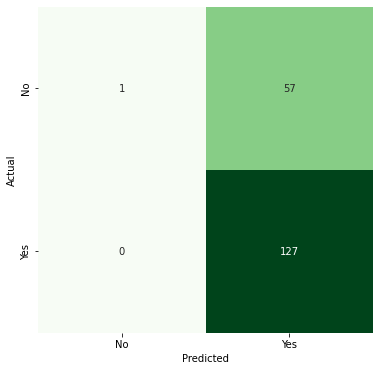

In [24]:
LR_cm = confusion_matrix(Y_test, LR_Test_pred)
plt.figure(figsize=(6,6))
sns.heatmap(LR_cm, annot=True, fmt='d', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'], cmap=plt.cm.Greens, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [25]:
print(classification_report(Y_test,LR_Test_pred))

              precision    recall  f1-score   support

           0       1.00      0.02      0.03        58
           1       0.69      1.00      0.82       127

    accuracy                           0.69       185
   macro avg       0.85      0.51      0.43       185
weighted avg       0.79      0.69      0.57       185



## Support Vector Machine (SVM)

Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. However, primarily, it is used for Classification problems in Machine Learning.
The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane. 

In [26]:
from sklearn.svm import SVC

In [27]:
SVM_Model = SVC(C= .1, kernel='linear', gamma= 1)
SVM_Model.fit(X_train, Y_train)

C:\Users\91798\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.1, gamma=1, kernel='linear')

In [28]:
SVM_Train_pred=SVM_Model.predict(X_train)
SVM_Modeltrain=accuracy_score(SVM_Train_pred,Y_train)

SVM_Test_pred=SVM_Model.predict(X_test)
SVM_Modeltest=accuracy_score(SVM_Test_pred,Y_test)

#Accuracy 
print('Accuracy of the SVM Model on testing data:',SVM_Modeltest)
print('Accuracy of the SVM Model on training data:',SVM_Modeltrain)

Accuracy of the SVM Model on testing data: 0.6864864864864865
Accuracy of the SVM Model on training data: 0.6876456876456877


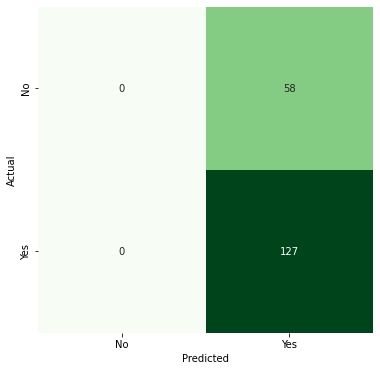

In [29]:
SVM_cm = confusion_matrix(Y_test, SVM_Test_pred)
plt.figure(figsize=(6,6))
sns.heatmap(SVM_cm, annot=True, fmt='d', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'], cmap=plt.cm.Greens, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [30]:
print(classification_report(Y_test,SVM_Test_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        58
           1       0.69      1.00      0.81       127

    accuracy                           0.69       185
   macro avg       0.34      0.50      0.41       185
weighted avg       0.47      0.69      0.56       185



C:\Users\91798\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91798\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91798\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Naïve Bayes

Naïve Bayes algorithm is a supervised learning algorithm, which is based on Bayes theorem and used for solving classification problems.Naïve Bayes Classifier is one of the simple and most effective Classification algorithms which helps in building the fast machine learning models that can make quick predictions.

It is a probabilistic classifier, which means it predicts on the basis of the probability of an object.
Some popular examples of Naïve Bayes Algorithm are spam filtration, Sentimental analysis, and classifying articles.

In [31]:
from sklearn.naive_bayes import GaussianNB
NB_Model = GaussianNB()
NB_Model.fit(X_train, Y_train)

C:\Users\91798\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [32]:
NB_Train_pred=NB_Model.predict(X_train)
NB_Modeltrain=accuracy_score(NB_Train_pred,Y_train)

NB_Test_pred=NB_Model.predict(X_test)
NB_Modeltest=accuracy_score(NB_Test_pred,Y_test)

#Accuracy  
print('Accuracy of the Naive Bayes Model on training data:',NB_Modeltrain)
print('Accuracy of the Naive Bayes Model on testing data:',NB_Modeltest)

Accuracy of the Naive Bayes Model on training data: 0.6573426573426573
Accuracy of the Naive Bayes Model on testing data: 0.6486486486486487


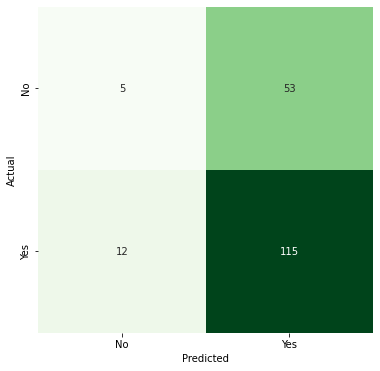

In [33]:
NB_cm = confusion_matrix(Y_test, NB_Test_pred)
plt.figure(figsize=(6,6))
sns.heatmap(NB_cm, annot=True, fmt='d', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'], cmap=plt.cm.Greens, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [34]:
print(classification_report(Y_test,NB_Test_pred))

              precision    recall  f1-score   support

           0       0.29      0.09      0.13        58
           1       0.68      0.91      0.78       127

    accuracy                           0.65       185
   macro avg       0.49      0.50      0.46       185
weighted avg       0.56      0.65      0.58       185



## Decision Tree

Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

The decisions or the test are performed on the basis of features of the given dataset.
It is a graphical representation for getting all the possible solutions to a problem/decision based on given conditions. It is called a decision tree because, similar to a tree, it starts with the root node, which expands on further branches and constructs a tree-like structure.In order to build a tree, we use the CART algorithm, which stands for Classification and Regression Tree algorithm.

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [36]:
DT_Model = DecisionTreeClassifier(criterion="gini", max_depth=3)
DT_Model.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=3)

In [37]:
DT_Train_pred=DT_Model.predict(X_train)
DT_Modeltrain=accuracy_score(DT_Train_pred,Y_train)

DT_Test_pred=DT_Model.predict(X_test)
DT_Modeltest=accuracy_score(DT_Test_pred,Y_test)

#Accuracy
print('Accuracy of the Decision Tree Model on training data:',DT_Modeltrain)
print('Accuracy of the Decision Tree Model on testing data:',DT_Modeltest)

Accuracy of the Decision Tree Model on training data: 0.703962703962704
Accuracy of the Decision Tree Model on testing data: 0.6594594594594595


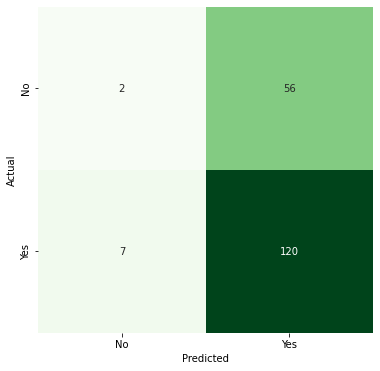

In [38]:
DT_cm = confusion_matrix(Y_test, DT_Test_pred)
plt.figure(figsize=(6,6))
sns.heatmap(DT_cm, annot=True, fmt='d', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'], cmap=plt.cm.Greens, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [39]:
print(classification_report(Y_test,DT_Test_pred))

              precision    recall  f1-score   support

           0       0.22      0.03      0.06        58
           1       0.68      0.94      0.79       127

    accuracy                           0.66       185
   macro avg       0.45      0.49      0.43       185
weighted avg       0.54      0.66      0.56       185



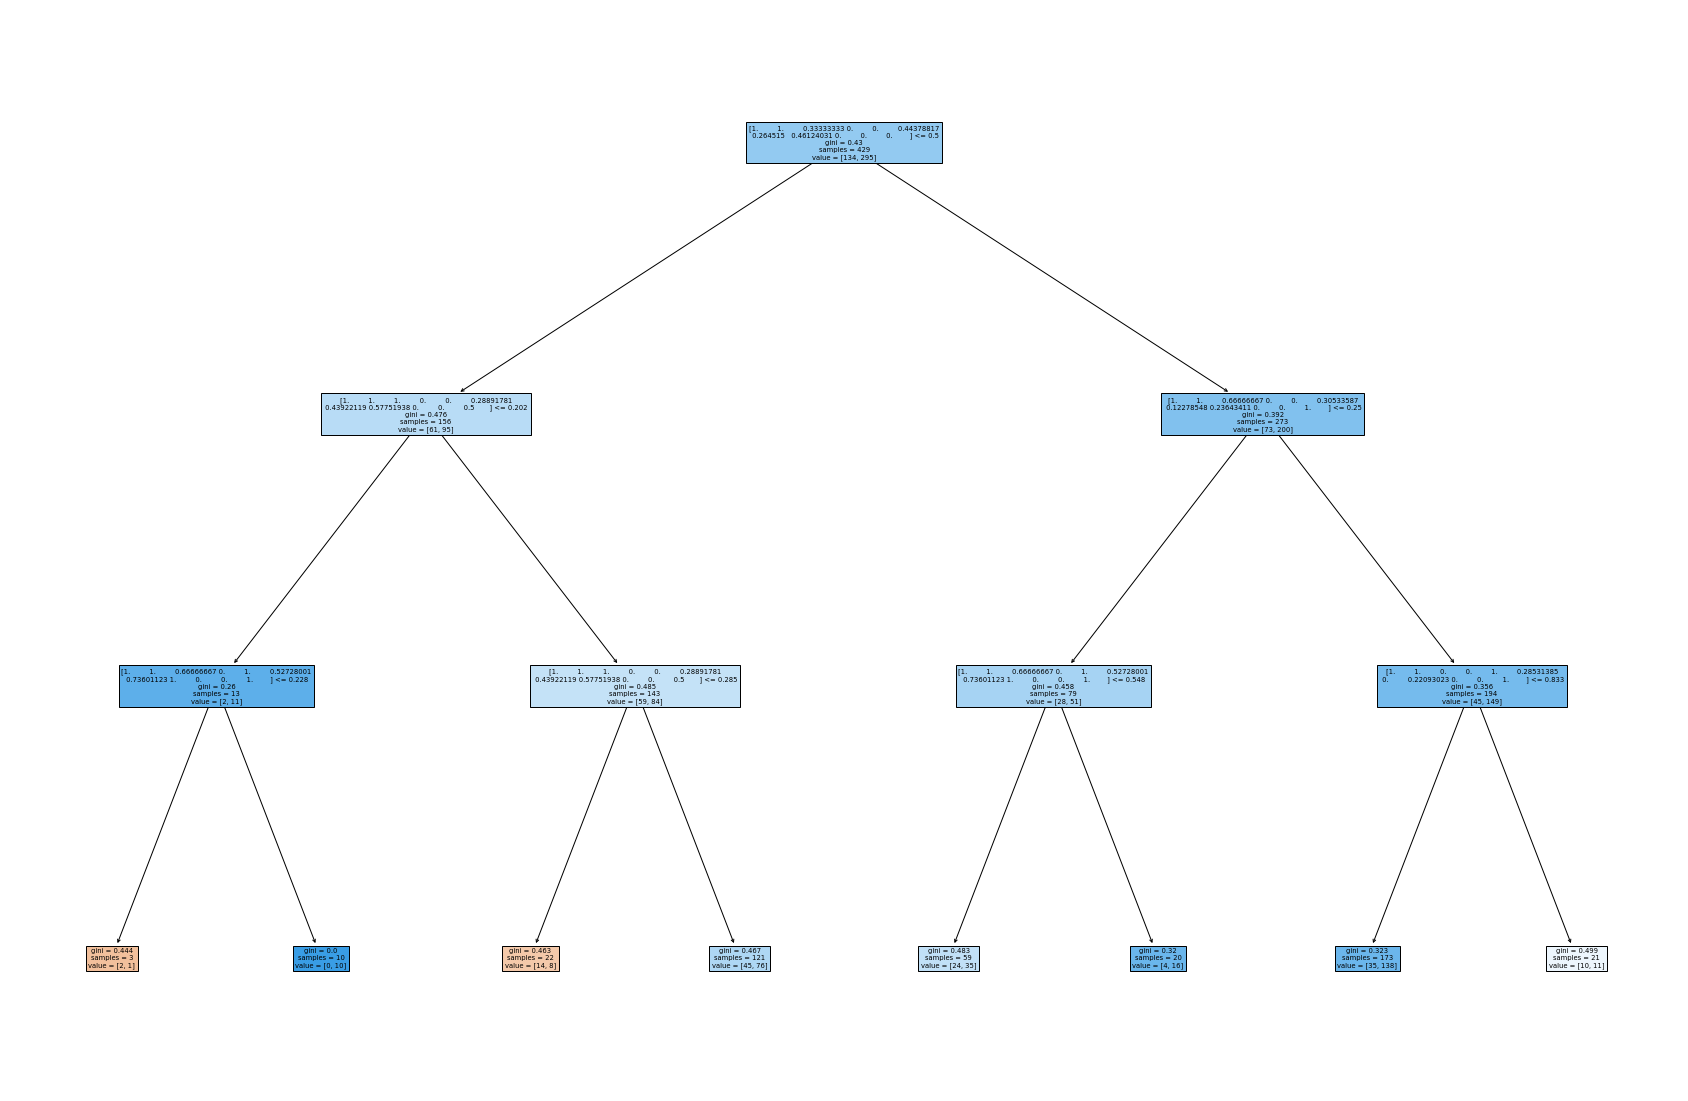

In [40]:
from sklearn import tree
fig = plt.figure(figsize=(30,20))
_ = tree.plot_tree(DT_Model, feature_names=X,  filled=True)

# K -Nearest Neighbor (KNN)

K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique.
K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories. This algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm. 

K-NN algorithm can be used for Regression as well as for Classification but mostly it is used for the Classification problems. It is a non-parametric algorithm, which means it does not make any assumption on underlying data.

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
KNN_Model = KNeighborsClassifier()
KNN_Model.fit(X_train,Y_train)

C:\Users\91798\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [43]:
KNN_Train_pred=KNN_Model.predict(X_train)
KNN_Modeltrain=accuracy_score(KNN_Train_pred,Y_train)

KNN_Test_pred=KNN_Model.predict(X_test)
KNN_Modeltest=accuracy_score(KNN_Test_pred,Y_test)

#Accuracy
print('Accuracy of the KNN Model on training data:',KNN_Modeltrain)
print('Accuracy of the KNN Model on testing data:',KNN_Modeltest)

Accuracy of the KNN Model on training data: 0.7435897435897436
Accuracy of the KNN Model on testing data: 0.6378378378378379


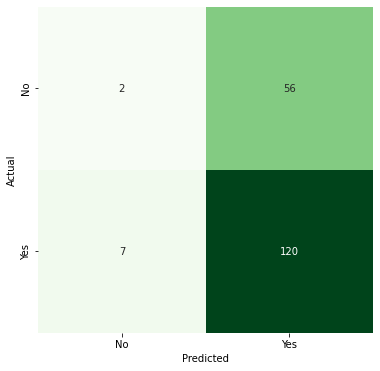

In [44]:
KNN_cm = confusion_matrix(Y_test, KNN_Test_pred)
plt.figure(figsize=(6,6))
sns.heatmap(DT_cm, annot=True, fmt='d', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'], cmap=plt.cm.Greens, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [45]:
print(classification_report(Y_test,KNN_Test_pred))

              precision    recall  f1-score   support

           0       0.38      0.26      0.31        58
           1       0.71      0.81      0.75       127

    accuracy                           0.64       185
   macro avg       0.55      0.53      0.53       185
weighted avg       0.60      0.64      0.61       185



## Random Forest

Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model. 

The greater the number of trees in a Random Forest Algorithm, the higher its accuracy and problem-solving ability.  Random Forest is a classifier that contains several decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset.

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
RF_Model = RandomForestClassifier()
RF_Model.fit(X_train,Y_train)

C:\Users\91798\AppData\Local\Temp\ipykernel_18812\2648833999.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_Model.fit(X_train,Y_train)


RandomForestClassifier()

In [48]:
RF_Train_pred=KNN_Model.predict(X_train)
RF_Modeltrain=accuracy_score(RF_Train_pred,Y_train)

RF_Test_pred=RF_Model.predict(X_test)
RF_Modeltest=accuracy_score(RF_Test_pred,Y_test)

#Accuracy
print('Accuracy of the Random Forest Model on training data:',RF_Modeltrain)
print('Accuracy of the Random Forest Model on testing data:',RF_Modeltest)

Accuracy of the Random Forest Model on training data: 0.7435897435897436
Accuracy of the Random Forest Model on testing data: 0.6702702702702703


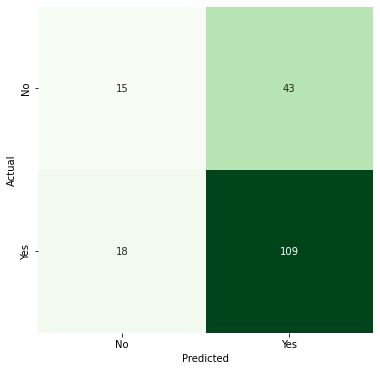

In [49]:
RF_cm = confusion_matrix(Y_test, RF_Test_pred)
plt.figure(figsize=(6,6))
sns.heatmap(RF_cm, annot=True, fmt='d', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'], cmap=plt.cm.Greens, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [50]:
print(classification_report(Y_test,RF_Test_pred))

              precision    recall  f1-score   support

           0       0.45      0.26      0.33        58
           1       0.72      0.86      0.78       127

    accuracy                           0.67       185
   macro avg       0.59      0.56      0.56       185
weighted avg       0.63      0.67      0.64       185



## Comparison of the ML models  

In [51]:
from tabulate import tabulate

results = pd.DataFrame({'LR':LR_Test_pred,
                        'SVM':SVM_Test_pred,
                        'NB':NB_Test_pred,
                        'DT':DT_Test_pred,
                        'KNN':KNN_Test_pred,
                        'RF':RF_Test_pred})
results = results.head(10)
print(tabulate(results , headers = ['Logistic Regression','SVM','Naive Bayes','Decision Tree',
                                    'K Nearest Neighbor','Random Forest'] ,
                                     tablefmt = 'pretty', showindex =False))

+---------------------+-----+-------------+---------------+--------------------+---------------+
| Logistic Regression | SVM | Naive Bayes | Decision Tree | K Nearest Neighbor | Random Forest |
+---------------------+-----+-------------+---------------+--------------------+---------------+
|          1          |  1  |      1      |       1       |         1          |       1       |
|          1          |  1  |      1      |       1       |         1          |       1       |
|          1          |  1  |      1      |       1       |         1          |       1       |
|          1          |  1  |      1      |       1       |         1          |       1       |
|          1          |  1  |      1      |       1       |         1          |       1       |
|          1          |  1  |      1      |       0       |         1          |       1       |
|          1          |  1  |      0      |       1       |         0          |       1       |
|          1          |  1  | 

In [52]:
Models = pd.DataFrame({
                          'Model': ['Logistic regression ',
                                    'SVM',
                                    'Naive Bayes',  
                                    'Decision Tree',
                                    'K Nearest Neighbor',
                                    'Random Forest'
                                  ],
                       
                          'Scoretrain': [LR_Modeltrain,
                                         SVM_Modeltrain,
                                         NB_Modeltrain,
                                         DT_Modeltrain,
                                         KNN_Modeltrain,
                                         RF_Modeltrain
                                        ],
                       
                             'scoretest':[LR_Modeltest,
                                          SVM_Modeltest,
                                          NB_Modeltest,
                                          DT_Modeltest,
                                          KNN_Modeltest,
                                          RF_Modeltest
                                          ]})

print(tabulate(Models , headers = ['Model' , 'Train' , 'Test'] , tablefmt = 'pretty', showindex =False))

+---------------------+--------------------+--------------------+
|        Model        |       Train        |        Test        |
+---------------------+--------------------+--------------------+
| Logistic regression | 0.6876456876456877 | 0.6918918918918919 |
|         SVM         | 0.6876456876456877 | 0.6864864864864865 |
|     Naive Bayes     | 0.6573426573426573 | 0.6486486486486487 |
|    Decision Tree    | 0.703962703962704  | 0.6594594594594595 |
| K Nearest Neighbor  | 0.7435897435897436 | 0.6378378378378379 |
|    Random Forest    | 0.7435897435897436 | 0.6702702702702703 |
+---------------------+--------------------+--------------------+


## Conclusion

- A machine learning model is defined as a mathematical representation of the output of the training process.The machine learning algorithm discovers patterns within the training data, and it outputs an ML model which captures these patterns and makes predictions on new data.
- Trained the different machine learning classifiers whether the customer is eligible for the loan amount or not.
- The different classifiers used are - Logistic Regression, SVM, Naive Bayes, Decision Tree, K-NN and Random Forest. And it can be observed that among all these classifiers, Random Forest is the best for this loan status prediction which gave 74% accuracy, highest under the considered models.
